In [250]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

In [447]:
x=np.linspace(-10,10,400)

In [448]:

h  = x[1]-x[0]
print(h)


0.05012531328320868


In [449]:
graf= lambda x : 1 / ( 1+ np.exp(-(x**2)))
f = graf(x)





In [450]:

def DerivativeC(x,f,h):
    return (f(x+h)-f(x-h))/(2*h)

In [451]:

DerivadaC = DerivativeC(x,graf,h)
DervidaVerdadera=  lambda x : x*np.exp(-(x**2)) /( (np.exp(-(x**2))+1)**3/2) #derivada calculada

#convolución discreta


In [453]:

def convolucion (f,h):  #multiplica cada valor de f ( menos los bordes) por el kerlen M 
                            # y luego suma los resultados, los divide entre 2h y luego lo coloca en una lista 
    l=[0]
    final= len(f)

  # para ir de x[1] a x[-2]
    for n in range (1,final-1): #ahora va de la posición 1 a len-1 
        r1=M[0]*f[n-1]
        r2=M[1]*f[n]
        r3=M[2]*f[n+1]
        rt=(r1+r2+r3) / (2*h)
        l.append(rt) 
    l.append(0)
    return np.array(l) 
        #g=mult_kernel (i+1,M.copy())


convol=convolucion (f,h)

convol2 = convolucion (convol,h)


In [454]:
def Derivative2da(x,f,h):
    for c in range(len(x)-2):
        r= ( f(x[c+2])-2*f(x)+ f(x[c-2]) )/4*(h**2)
    return r 
  
der2=Derivative2da(x,graf,h)


In [455]:
def Derivative4ta(x,f,h):
    l=[0]
    for c in range(len(x)-2):
        r4 = ( f(x[c+2])- 4*f(x[c+1])+ 6* f(x[c])- 4*f(x[c-1])+ f(x[c-2] ))/(h**4)
        l.append(r4)
    l.append(0)
    return l
der4=Derivative4ta(x,graf,h)


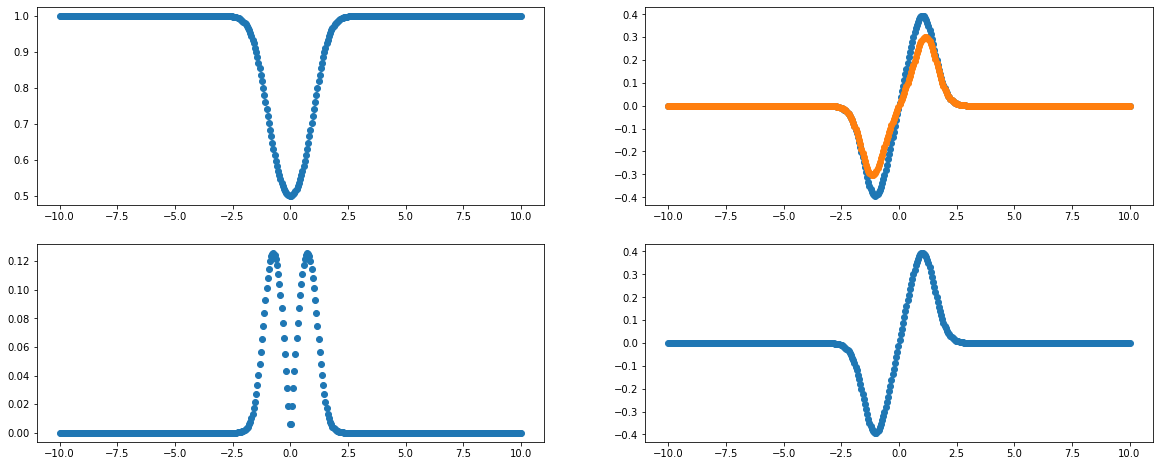

In [456]:
fig = plt.figure(figsize=(20,8),edgecolor='red')

ax = fig.add_subplot(2,2,1)

ax1 = fig.add_subplot(2,2,2)
ax2 = fig.add_subplot(2,2,3)
ax3= fig.add_subplot (2,2,4)


ax.scatter(x,f)  #1 grafica de la función sin derivar
ax1.scatter(x,DerivadaC)#2° derivada central (azul)
ax1.scatter(x,DervidaVerdadera(x))# 2° derivada verdadera (naranja)
ax2.scatter(x,np.abs(DervidaVerdadera(x)-DerivadaC)) # 3° diferencia entre cada punto nodal 
ax3.scatter (x,convol) #4° derivada calculada a travez de convolución discreta



#segunda derivada 

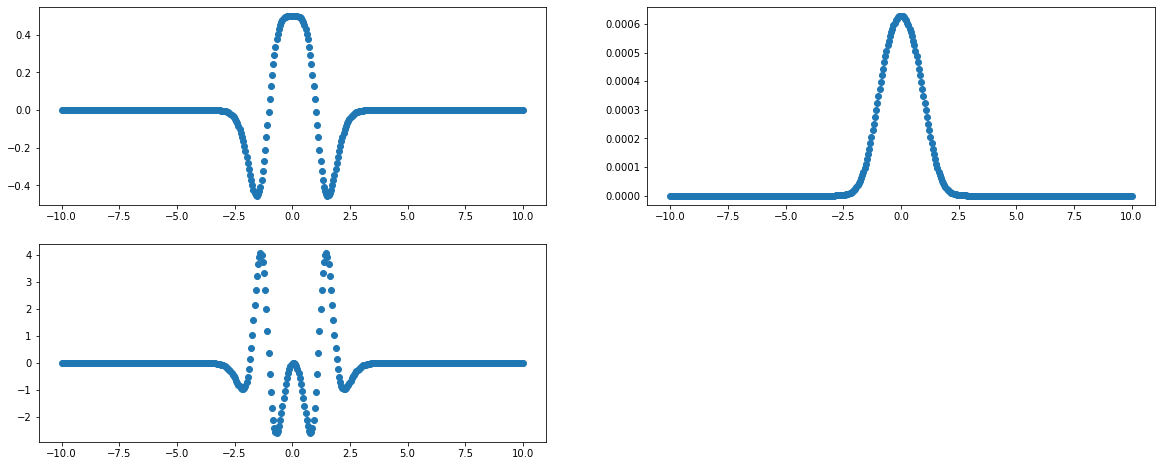

In [457]:
fig = plt.figure(figsize=(20,8),edgecolor='red')
ax4= fig.add_subplot (2,2,1)
ax5= fig.add_subplot (2,2,2)
ax6= fig.add_subplot (2,2,3)
ax4.scatter (x,convol2)#1°derivada 2da con convolución discreta 
ax5.scatter (x,der2)#2° derivada discreta con la formula dada enla guia
ax6.scatter (x,der4) #3° derivada 4ta con la formula del a guia
